In [2]:

import pandas as pd

# Load the data set
df = pd.read_csv("C:/Users/nora_/Downloads/mushrooms (1).csv")
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:

df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
# Count how many edible vs poisonous mushrooms
df["class"].value_counts()


class
e    4208
p    3916
Name: count, dtype: int64

In [6]:
# See if any columns have missing values
df.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')


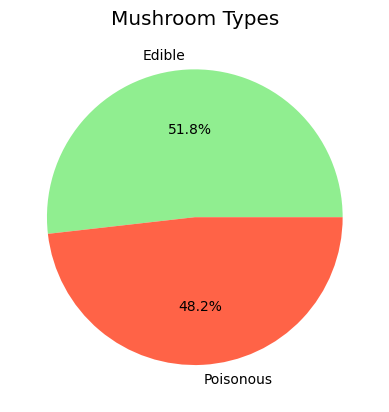

In [8]:
# Pie chart showing proportion of edible vs poisonous mushrooms
df['class'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Edible', 'Poisonous'],
    colors=['lightgreen', 'tomato'],
    title='Mushroom Types'
)
plt.ylabel('')
plt.show()


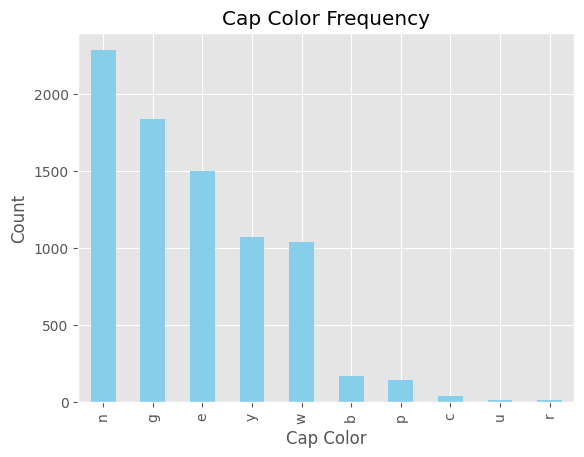

In [9]:
# Bar chart of cap colors
df['cap-color'].value_counts().plot.bar(
    color='skyblue',
    title='Cap Color Frequency'
)
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.show()


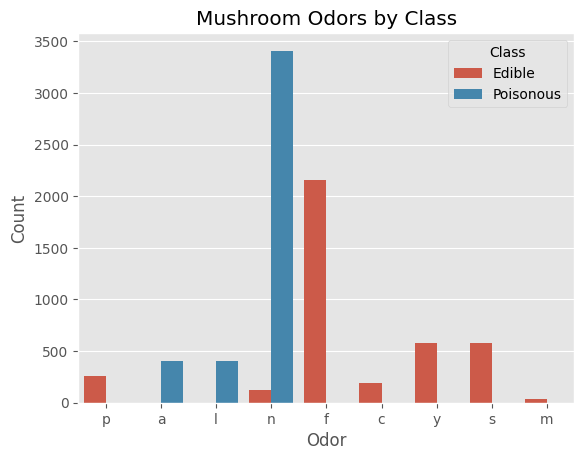

In [10]:
# Odors more common in edible vs poisonous mushrooms
sns.countplot(x='odor', hue='class', data=df)
plt.title('Mushroom Odors by Class')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()


C:\Users\nora_\AppData\Local\Temp\ipykernel_8612\3985716230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='habitat', data=df, palette='pastel')


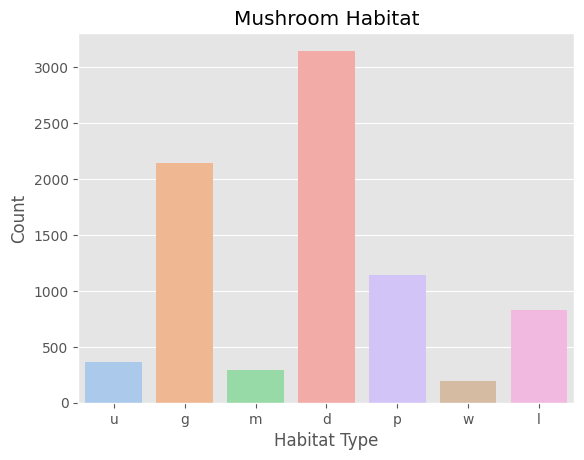

In [11]:
# Habitat distribution
sns.countplot(x='habitat', data=df, palette='pastel')
plt.title('Mushroom Habitat')
plt.xlabel('Habitat Type')
plt.ylabel('Count')
plt.show()


In [13]:
# Encode columns (from values to numbers)
from sklearn.preprocessing import LabelEncoder

# Keep copy of the original data
df_encoded = df.copy()

# Create the encoder
le = LabelEncoder()

# Go through each column and convert
for column in df_encoded.columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

# Check the first few rows
df_encoded.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
from sklearn.model_selection import train_test_split

# Features (everything except 'class')
X = df_encoded.drop("class", axis=1)

# Class to predict (edible vs poisonous)
y = df_encoded["class"]

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [16]:
# Test the model
accuracy = model.score(X_test, y_test)

print(f"Model accuracy: {accuracy * 100:.2f}%")


Model accuracy: 100.00%


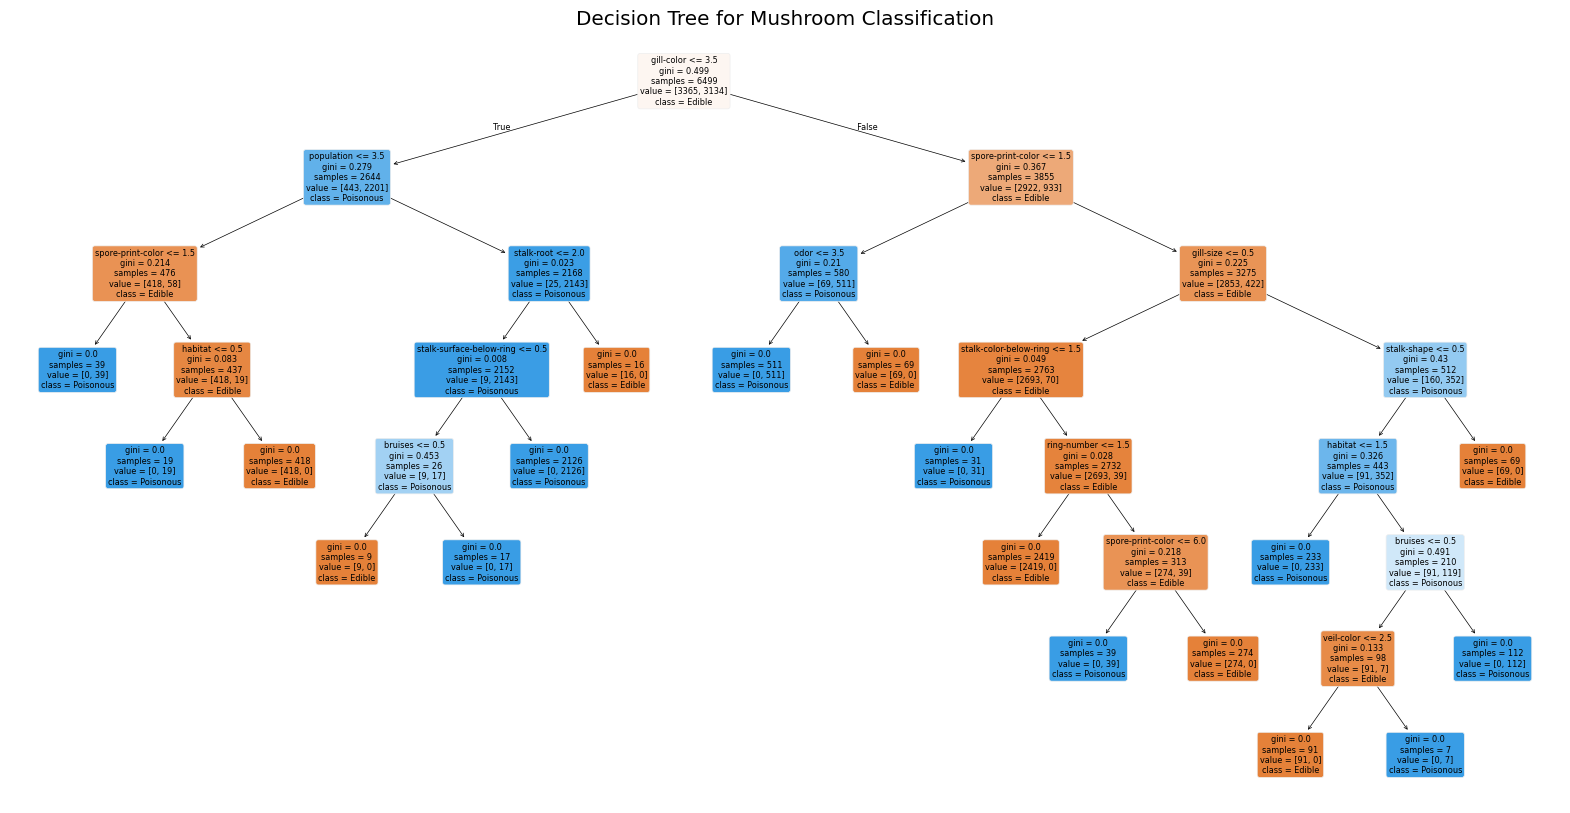

In [17]:
#Visualise the model

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plot_tree(model, 
          feature_names=X.columns, 
          class_names=["Edible", "Poisonous"], 
          filled=True, 
          rounded=True)

plt.title("Decision Tree for Mushroom Classification")
plt.show()
